<div style='background: repeating-radial-gradient(circle at 10%, rgb(176, 245, 220), #333 10px, #eee 10px, #eee 20px) ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 300px'>
<div style="float: left ; margin: 80px ; margin-left: 320px; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 60% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Acústica y Psicoacústica I</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Sistema masa-resorte con múltiples grados de libertad</div>
        </div>
    </div>
</div>

En este notebook se describen los siguientes conceptos:
* Ecuaciones que definen un sistema masa-resorte con multiples grados de libertad: cantidad de resortes y masas asociadas
* Notacion matricial: Implementacion de las matrices de masa y rigidez.
* Solucion de los modos de resonancia mediante concepto de autovalores y autovectores.
* Condiciones de contorno fijo y libre.

## Desarrollo teórico





### Modos propios de oscilacion: Metodo de autovalores y autovectores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

In [27]:
#DATOS:
N_e = 40          #Numero de elementos (resortes)
N_n = N_e+1      #Numero de nodos
glxn = 1         #Grados de libertad por nodo
k_e = 1500       #Rigidez de los resortes [N/m]
m_e = 0.1        #Masa de elemento [m]
l_tot = 10        #Largo total 
extremo = ['fijo', 'libre']
      
#------------------------------------------------

MN = np.arange(0, N_n, 1)
MC = np.array([[n, n+1] for n in range(N_e)])



In [28]:

#Matriz de rigidez
matriz_Kglobal = np.zeros([glxn*N_n, glxn*N_n])
#Matriz de masa
matriz_Mglobal = np.zeros([glxn*N_n, glxn*N_n])
for i in range(N_e):
    a, b = MC[i]
    
    #Matriz de rigidez
    matriz_Klocal = k_e*np.array([[1, -1],[-1, 1]])
    ind = np.linspace(a, b, 2).astype(int)     
    matriz_Kglobal[np.ix_(ind, ind)] += matriz_Klocal 
    
    #Matriz de masas
    #matriz_Mlocal = m_e*np.array([[1, 0],[0, 1]])
    #matriz_Mglobal[np.ix_(ind, ind)] += matriz_Mlocal
    matriz_Mglobal[i][i] = m_e
matriz_Mglobal[-1][-1] = m_e

r = np.arange(N_n)
s=[]
if extremo[0] == 'fijo':
    matriz_Kglobal[0][0] += k_e
    s.append(0)                  #nodo fijo
if extremo[1] == 'fijo':
    matriz_Kglobal[-1][-1] += k_e
    s.append(N_n-1)              #nodo fijo

r = np.delete(r,s)

#Definos las matrices reducidas: le saco las filas que corresponden a nodos fijos
matriz_Mred = matriz_Mglobal[np.ix_(r, r)]
matriz_Kred = matriz_Kglobal[np.ix_(r, r)]


In [29]:
w2, dmod = eigh(matriz_Kred, matriz_Mred)
frec_propias = np.sqrt(w2)/(2*np.pi)

u_n = np.zeros(N_n)   #Desplazamiento de los nodos

dmod = np.transpose(dmod/dmod[-1, :])  #desplazamientos para cada numero de modo (columnas)

if len(s) > 1:
    s[1] -= 1

dmod = np.insert(dmod, (s), u_n[s].reshape(1,-1), axis=1)

#dmod

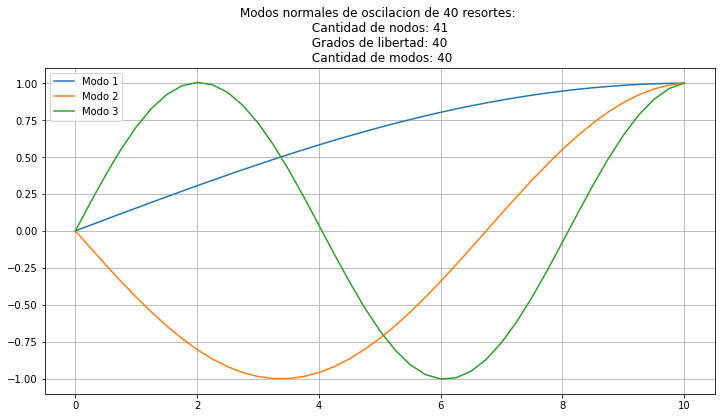

In [30]:


dist = np.linspace(0, l_tot, N_n)
fig = plt.figure(figsize=(12,6))
for i in range(3):   #Grafico los primeros 4 modos
    plt.plot(dist, dmod[i], label=f'Modo {i+1}')
plt.title(f'Modos normales de oscilacion de {N_e} resortes: \n Cantidad de nodos: {N_n} \n Grados de libertad: {N_n-len(s)} \n Cantidad de modos: {len(frec_propias)}')
plt.legend()
plt.grid()
plt.show()

In [26]:
#Tabla con frecuencias propias

encabezado = []
head_str = ''
separador = ''
titulos = ('Modo', 'Hz')
for t in titulos:
    head_str += f'{t:>7s}'
    separador +='--------- '
encabezado.extend([head_str, separador])

frec_propias.reshape(-1,1)
for t in encabezado:
    print(t)
for i, f in enumerate(frec_propias):
    #print(i, f)
    print('%5d %10.2f' % (i, f))


   Modo     Hz
--------- --------- 
    0       6.77
    1      19.49
    2      29.86
    3      36.63


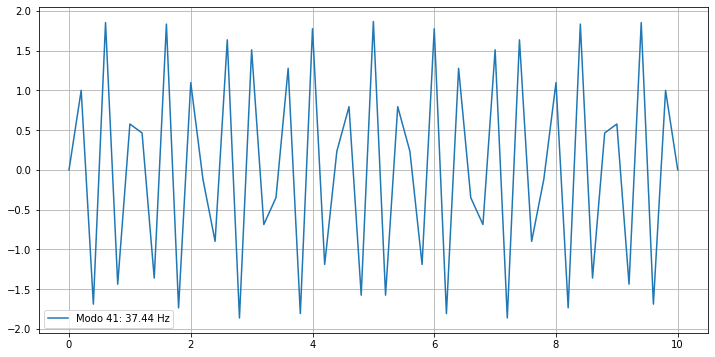

In [606]:
#Plot de algun modo en particular

modo = 40
plt.figure(figsize=(12,6))
plt.plot(dist, dmod[modo], label=f'Modo {modo+1}: {frec_propias[modo].round(2)} Hz')
plt.legend()
plt.grid()

In [583]:
i

18